In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from util import *
import matplotlib.pyplot as plt
%matplotlib inline
import gc

In [2]:
train_data = pd.read_pickle('dataset/merged_train.pkl')
test_data = pd.read_pickle('dataset/merged_test.pkl')

In [3]:
X_train = train_data
X_test = test_data

In [4]:
column_means = X_train.mean(numeric_only=True)
X_train = X_train.fillna(column_means)
X_train.head(20)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.500,W,13926,362.555488,150.0,discover,142.0,...,NaN,26.508597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.000,W,2755,404.000000,150.0,mastercard,102.0,...,NaN,26.508597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.000,W,4663,490.000000,150.0,visa,166.0,...,NaN,26.508597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.000,W,18132,567.000000,150.0,mastercard,117.0,...,NaN,26.508597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.000,H,4497,514.000000,150.0,mastercard,102.0,...,samsung browser 6.2,32.000000,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
5,2987005,0,86510,49.000,W,5937,555.000000,150.0,visa,226.0,...,NaN,26.508597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.000,W,12308,360.000000,150.0,visa,166.0,...,NaN,26.508597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.500,W,12695,490.000000,150.0,visa,226.0,...,NaN,26.508597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.000,H,2803,100.000000,150.0,visa,226.0,...,mobile safari 11.0,32.000000,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
9,2987009,0,86536,117.000,W,17399,111.000000,150.0,mastercard,224.0,...,NaN,26.508597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
X_train = X_train.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [6]:
catf, numf = cat_num_features(X_train)
categorical_feature_indices = [X_train.columns.get_loc(f) for f in catf]

In [7]:
# Imputing the missing values of Categorical Columns with "missing"
X_train[catf] = X_train[catf].fillna('missing')
X_test[catf] = X_test[catf].fillna('missing')


# Label Encoding Categorical Features
X_train, X_test = label_encode(X_train, X_test, catf)

In [8]:
y = X_train['isFraud']
X = X_train.drop(['isFraud'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

In [9]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\judyk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)

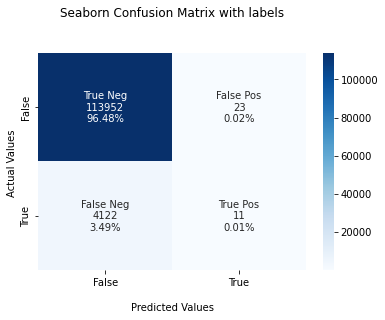

In [12]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()